In [8]:
from pomegranate import*

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kde
import json

In [10]:
from hmm_helpers import build_hmm
from helpers import WindowType

In [11]:
sns.set(color_codes=True)

In [12]:
ffile = "../"
hmm_file = ffile + "HMM_Model_0.json"
path = ffile 

In [13]:
with open(hmm_file) as json_file:
    hmm_json_map = json.load(json_file)
    hmm_json_map = json.loads(hmm_json_map)
    #print(hmm_json_map)
    
    print("Start state: ")
    print("Distribution: ", hmm_json_map["start"]["distribution"])
    
    print("End state:")
    print("Distribution: ", hmm_json_map["end"]["distribution"])
    
    states = hmm_json_map["states"]
    
    for state in states:
        print("State: ", state["name"])
        print("State weight: ", state["weight"])
        distribution = state["distribution"]
        
        if distribution is not None:
        
            print("Distribution: ", distribution["class"])
            
            if distribution["class"] == "Distribution":
                print("Distribution name: ", distribution["name"])
                print("Distribution params: ", distribution["parameters"])
                
            elif distribution["class"] == "GeneralMixtureModel":
                distributions = distribution["distributions"]
                
                for dist in distributions:
                    print("Distribution name: ", dist["name"])
                    print("Distribution params: ", dist["parameters"])
                print("Weights: ", distribution["weights"])
                    
                
                
    
    

Start state: 
Distribution:  None
End state:
Distribution:  None
State:  GAP_STATE
State weight:  1.0
Distribution:  Distribution
Distribution name:  IndependentComponentsDistribution
Distribution params:  [[{'class': 'Distribution', 'name': 'UniformDistribution', 'parameters': [-999.0, -999.0], 'frozen': False}, {'class': 'Distribution', 'name': 'UniformDistribution', 'parameters': [-999.0, -999.0], 'frozen': False}], [1.0, 1.0]]
State:  STATE_0
State weight:  1.0
Distribution:  Distribution
Distribution name:  IndependentComponentsDistribution
Distribution params:  [[{'class': 'GeneralMixtureModel', 'distributions': [{'class': 'Distribution', 'name': 'NormalDistribution', 'parameters': [2.5843583316017282, 1.0473903794941886], 'frozen': False}, {'class': 'Distribution', 'name': 'UniformDistribution', 'parameters': [0.0, 2.78], 'frozen': False}], 'weights': [0.41353247661994696, 0.5864675233800531]}, {'class': 'GeneralMixtureModel', 'distributions': [{'class': 'Distribution', 'name': 

In [7]:
# this is the model we trained
hmm = build_hmm(hmm_file)

# make sure that no updsates occur
#hmm.freeze()

Working with state:  GAP_STATE
Working with state:  STATE_0
Working with state:  STATE_1
Working with state:  STATE_2
Working with state:  STATE_3
Working with state:  HMM_Model-start
Working with state:  HMM_Model-end
Orphan state HMM_Model-start removed due to no edges                             leading to it
Orphan state HMM_Model-end removed due to no edges                             leading to it


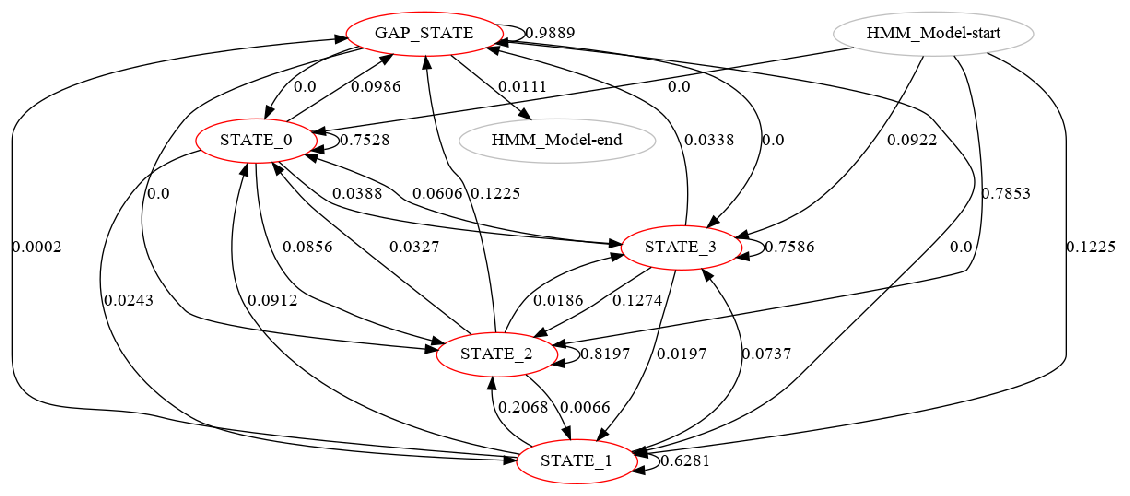

In [8]:
# visualize the model we just trained
plt.figure( figsize=(20,18) )
hmm.plot()
plt.show()

In [9]:
# load a sequence other than that we trained the HMM
from train import make_window_regions
from helpers import read_configuration_file

In [10]:
configuration=read_configuration_file("config.json")


In [11]:
configuration["regions"]["start"]=[2000000]
configuration["regions"]["end"]=[3000000]

In [12]:
regions = make_window_regions(configuration=configuration)

INFO: Window size: 100
INFO: Chromosome:  chr1
INFO: Regions used {'start': [2000000], 'end': [3000000]}
INFO: Start index: 2000000
INFO: End index:   3000000
INFO: Creating WGA Windows...
INFO: Reference file: b'/scratch/spectre/a/ag568/GCA_000001405.15_GRCh38_no_alt_analysis_set.fna'
INFO: Alternative file: b'/scratch/spectre/a/ag568/m605_verysensitive_trim_sorted.bam' 
INFO: Not using quality threshold


INFO: Number of errors: 0
INFO: Number of adjusted: 0
INFO: Bam length: 892294
INFO: Extracting common bases


INFO: Estimated number of windows: 8922 
INFO: Number of WGA windows: 10008
INFO: Creating No WGA Windows...
INFO: Reference file: b'/scratch/spectre/a/ag568/GCA_000001405.15_GRCh38_no_alt_analysis_set.fna'
INFO: Alternative file: b'/scratch/spectre/a/ag568/m585_verysensitive_trim_sorted.bam' 
INFO: Not using quality threshold


INFO: Number of errors: 0
INFO: Number of adjusted: 0
INFO: Bam length: 954674
INFO: Extracting common bases


INFO: Estimated number of windows: 9546 
INFO: Number of non-wga windows: 10001
INFO: Marking N  windows with: -999
INFO: Marked as N 440 Windows
INFO: Number of mixed windows: 10001
INFO: Number of N windows: 440
INFO: Number of windows after outlier removal: 9299
INFO: Number of N windows after outlier removal 440


In [13]:
print("Number or regions: {0}".format(len(regions)))

Number or regions: 1


In [14]:
# create a sequence from region 0
sequence = regions[0].get_sequence(size=50, window_type=WindowType.NO_WGA)


In [15]:
print(sequence)

[13.97, 17.67, 20.48, 14.78, 12.71, 10.36, 18.61, 14.47, 16.02, 16.04, 11.32, 11.99, 16.64, 12.69, 12.84, 20.04, 23.64, 19.3, 22.03, 18.97, 11.76, 20.36, 23.11, 19.74, 20.24, 18.27, 20.8, 28.06, 21.5, 21.9, 18.51, 18.49, 21.79, 18.84, 21.11, 15.61, 15.18, 16.61, 10.48, 15.53, 13.09, 19.48, 17.84, 13.27, 12.76, 13.56, 12.53, 17.9, 10.61, 11.99]


Run the Viterbi algorithm on the sequence given the model. This finds the ML path of hidden states given the sequence. Returns a tuple of the log probability of the ML path, or (-inf, None) if the sequence is impossible under the model. 
If a path is returned, it is a list of tuples of the form (sequence index, state object).

In [16]:
viterbi_path=hmm.viterbi(sequence)

In [17]:
print("Log-probability of ML Viterbi path: ", viterbi_path[0])

if viterbi_path[1] is not None:
    print("Viterbi path length: ", len(viterbi_path[1]))

    for item in range(len(sequence)):
        print("sequnce item: {0} state {1}".format(sequence[item], viterbi_path[1][item][1].name))


Log-probability of ML Viterbi path:  -inf


In [18]:
n_seqs=None

In [28]:

sequences = regions[0].get_region_as_sequences(size=20, window_type=WindowType.NO_WGA, n_seqs=n_seqs)

# make sure we have as many sequences we requested
#assert len(sequences) == n_seqs, "Invalid number of sequences"

In [29]:
print("Number of sequences: ", len(sequences))

Number of sequences:  464


In [31]:
for i, seq in enumerate(sequences):
    
    if -999 in seq:
        print("Sequence index: ", i)

Sequence index:  325
Sequence index:  326
Sequence index:  327
Sequence index:  328
Sequence index:  329
Sequence index:  330
Sequence index:  331
Sequence index:  332
Sequence index:  333
Sequence index:  334
Sequence index:  335
Sequence index:  336
Sequence index:  337
Sequence index:  338
Sequence index:  339
Sequence index:  340
Sequence index:  341
Sequence index:  342
Sequence index:  343
Sequence index:  344
Sequence index:  345
Sequence index:  346
Sequence index:  347


In [21]:
for seq in sequences:
    
    #print(seq)
    
    viterbi_path=hmm.viterbi(sequence)
    
    print("Log-probability of ML Viterbi path: ", viterbi_path[0])

    if viterbi_path[1] is not None:
        print("Viterbi path length: ", len(viterbi_path[1]))

        for item in range(len(sequence)):
            print("sequnce item: {0} state {1}".format(sequence[item], viterbi_path[1][item][1].name))

Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path

In [34]:
p_d_given_m = hmm.log_probability(sequence=sequences[150])
print("P(D|M): ", p_d_given_m)

print(sequences[0])
print(hmm.predict_proba(sequences[0]))

P(D|M):  -inf
[13.97, 17.67, 20.48, 14.78, 12.71, 10.36, 18.61, 14.47, 16.02, 16.04, 11.32, 11.99, 16.64, 12.69, 12.84, 20.04, 23.64, 19.3, 22.03, 18.97]
[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
